# EDA

Before I define the report and problem at hand, I first want to say this report was inspired by Kobe Bryant as he was a major factor for me falling in love with the sport of Basketball, may he rest in piece.

As well, the process of writing this report and staying motivated is dedicated to the King of New York, Pop Smoke for creating music that brings energy and motivation to anybody who listens to it, may he rest in piece.

---

# Why

Every year, 60 NCAA and European league players are drafted into the NBA. Of those 60, 14 of 
them are selected in the lottery, in which the teams who were unable to qualify for the best of 
seven series amongst other teams to compete for the championship are put into said lottery 
(worse the record, the better odds of a high pick). NBA general members are responsible for 
drafting the right players to complement their teams or in this case build around. They
specifically have scouts who go to different games these players play in and analyze their game. 
My report is to supplement the scouting reports by providing a more in-depth analysis on what 
kind of current or past NBA player the up-and-coming prospect is projected to be. As this 
information is not available to the public, what I have done instead is use other media platforms 
such as Bleacher Report and Draft Net who specifically write articles on what each year’s draft 
prospects real time NBA comparison is with the help of analysts behind the scenes.
The NBA is a league of 30 teams of which 15 people comprise a team. Team statistics exist, but 
individuals carry more to the team. There are a vast variety of NBA statistics that range from the 
old ones in points per game to new ones in player efficiency rating. With these statistics, a 
player’s career is uniquely defined, and as such can be compared amongst others. The data set is 
comprised of quantitative fields, so models that go hand in hand with say NLP cannot be applied 
here. What can be, is logistics regression depending on how you phrase the target variable, linear 
to model increases in one statistic compared to others, to machine learning concepts like 
clustering in which we group and from there have an easier way of comparing players.

---

Lets start by importing our packages we're going to need, we're not going to need all of them in this file but it is consistent with the others

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For web scraping
import requests
from bs4 import BeautifulSoup
import seaborn as sns
# For performing regex operations
import re

# For adding delays so that we don't spam requests
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm #used for plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # 1. Import the scaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from numpy import unique

Lets start by cleaning our NBA data

## NBA STATISTICS EDA

read the file in our downloads directory that we downloaded from kaggle

In [2]:
nba_stats = pd.read_csv('~/Downloads/all_seasons.csv')

Lets take a quick preview of our data

In [3]:
nba_stats.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


There are some important stats, specifically the draft information which is all I want from this data set

In [4]:
nba_stats.isna().sum().sum()

0

No NaN's so no EDA is needed

In [5]:
nba_stats.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

we're just looking at any other columns that could be useful but from already peeking at the other data set that will be looked at this is lacking other stats

In [6]:
nba_stats.shape

(11145, 22)

we have 11,145 rows and 22 columns (21 because the second column after the index doesn't resemble anything interesting.

In [7]:
nba_stats['player_name']

0             Dennis Rodman
1         Dwayne Schintzius
2              Earl Cureton
3               Ed O'Bannon
4               Ed Pinckney
                ...        
11140           Maxi Kleber
11141    Melvin Frazier Jr.
11142        Meyers Leonard
11143          Norvel Pelle
11144           Matt Thomas
Name: player_name, Length: 11145, dtype: object

Just to make sure I, a long time viewier of the NBA knows the names (to validate that the guy who posted it didn't make and names up) we can see that I recognize some of these names even the guys not so popular like Maxi Kleber, and an ex Raptor, Matt Thomas.

In [8]:
numeric_col = ['gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']

<ipython-input-9-7de54efa8d25>:9: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


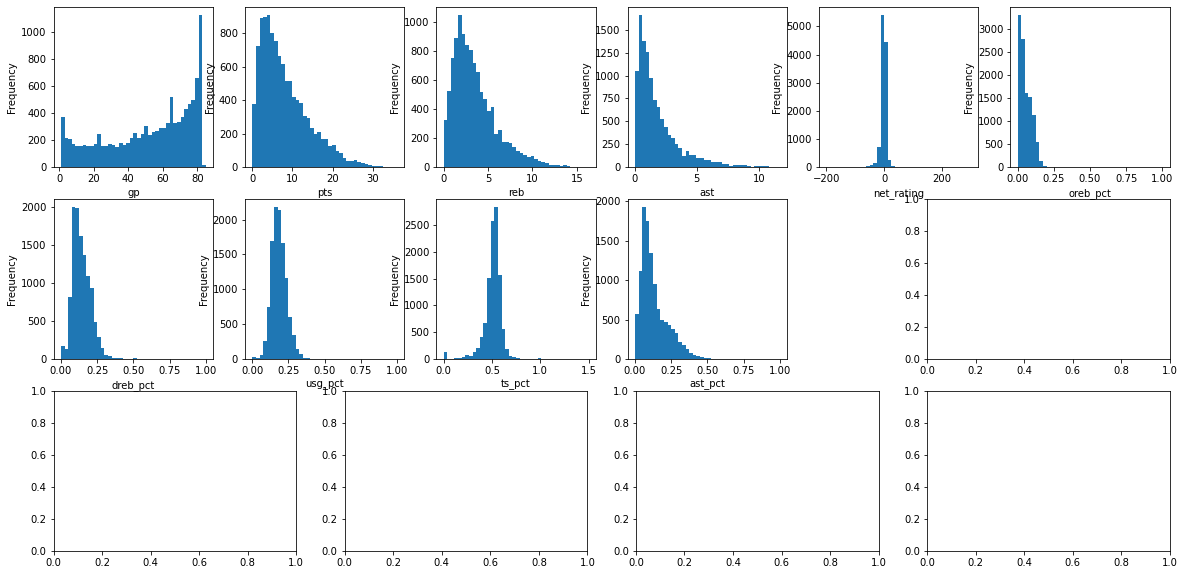

In [9]:
plt.subplots(3,4,figsize=(20,10))

for idx, col_name in enumerate(numeric_col,1):
    plt.subplot(3,6,idx)
    nba_stats[col_name].plot(kind='hist',bins=40)
    #clean_marketing_data[col_name].plot(kind='boxplot',bins=50)
    plt.xlabel(col_name)

plt.tight_layout()
#plt.suptitle('Numeric col freq')
plt.show()

- `gp`: a more rounded out left skew where see a lot of players playing a whole seasons worth of games

- `pts`: right skewed

- `reb`: right skewed

- `ast`: right skewed

- `net_rating`: normal distirbuted around 0

- `oreb_pct`: right skewed

- `dreb_pct`: right skewed or normally distributed around 0.03

- `usg_pct`: normal distributed around 0.03

- `ts_pct`: normaly distributed around 0.5

- `ast_pct`: right skewed

This data set is a reference data in case I need to validate or look up any players throughout the whole project

In [10]:
diff_nba_table = pd.read_csv('~/Downloads/player_data.csv')
diff_nba_table.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Lets now read the actual NBA data set where we will need everything associated in it to make predicitions

In [11]:
season_stats = pd.read_csv('~/Downloads/Seasons_Stats.csv')
season_stats.set_index('Unnamed: 0')
season_stats.drop(columns='Unnamed: 0',inplace=True)
season_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


I read, dropped the useless column and viewed the data set from the above code

lets take a look at the data types for our data set

In [12]:
season_stats.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

So as I expected and wanted to be, everything is a float except for those that make sense to be objects specifically a string for the players name, their team name, and their position.

In [13]:
season_stats.shape

(24691, 52)

after taking a look at the shape we have 24,691 rows of data where each row is unique to each player for the year and team they player for. There are 52 columns, 4 of which help identify who the player is, and the other 48 that are NBA statistics

In [14]:
season_stats.isna().sum().sum()

154919

So unlike the other two data sets, we have a lot of NaN's in our data set, specifically 154,919, so there is a quite a bit of work and justification needed to clean this data set

In [15]:
season_stats.isna().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

so if we have NaN's for Player names that means we have rows that shouldn't be included as the 4 coluns we need as we will see below are also NaN so we cant identify who the player is

In [16]:
season_stats[season_stats['Player'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
season_stats.dropna(subset=['Player'],inplace=True)

So lets just drop these because its no where near 3% of our data

In [18]:
season_stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [19]:
season_stats.isna().sum()

Year          0
Player        0
Pos           0
Age           8
Tm            0
G             0
GS         6391
MP          486
PER         523
TS%          86
3PAr       5785
FTr          99
ORB%       3832
DRB%       3832
TRB%       3053
AST%       2069
STL%       3832
BLK%       3832
TOV%       5042
USG%       4984
blanl     24624
OWS          39
DWS          39
WS           39
WS/48       523
blank2    24624
OBPM       3827
DBPM       3827
BPM        3827
VORP       3827
FG            0
FGA           0
FG%          99
3P         5697
3PA        5697
3P%        9208
2P            0
2PA           0
2P%         128
eFG%         99
FT            0
FTA           0
FT%         858
ORB        3827
DRB        3827
TRB         312
AST           0
STL        3827
BLK        3827
TOV        4979
PF            0
PTS           0
dtype: int64

So what I'm noticing is that 1950-1970 is having way to many NaN's as some stats didnt exist, for the sake of familiarity and the fact that the 1950's were 70 years ago, and NBA programs don't refer to much to these years of play I'm going to remove the interval of 1950-1970

In [20]:
season_stats[season_stats['MP'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,1951.0,Brady Walker,PF,29.0,BOS,17.0,NaN,NaN,NaN,0.419,...,0.556,NaN,NaN,31.0,8.0,NaN,NaN,NaN,11.0,31.0
483,1951.0,Brady Walker,PF,29.0,BLB,49.0,NaN,NaN,NaN,0.435,...,0.713,NaN,NaN,323.0,103.0,NaN,NaN,NaN,71.0,369.0
484,1951.0,Paul Walther,SG,23.0,INO,63.0,NaN,NaN,NaN,0.393,...,0.694,NaN,NaN,226.0,225.0,NaN,NaN,NaN,201.0,571.0
485,1951.0,Bobby Wanzer*,G,29.0,ROC,68.0,NaN,NaN,NaN,0.492,...,0.850,NaN,NaN,232.0,181.0,NaN,NaN,NaN,129.0,736.0


In [21]:
np.where(season_stats['Year'] > 1970)

(array([ 3048,  3049,  3050, ..., 24621, 24622, 24623], dtype=int64),)

In [22]:
season_stats = season_stats[3048:]

In [23]:
season_stats.isna().sum()

Year          0
Player        0
Pos           0
Age           0
Tm            0
G             0
GS         3343
MP            0
PER           5
TS%          85
3PAr       2737
FTr          98
ORB%        784
DRB%        784
TRB%          5
AST%          5
STL%        784
BLK%        784
TOV%       1994
USG%       1936
blanl     21576
OWS           0
DWS           0
WS            0
WS/48         5
blank2    21576
OBPM        779
DBPM        779
BPM         779
VORP        779
FG            0
FGA           0
FG%          98
3P         2649
3PA        2649
3P%        6160
2P            0
2PA           0
2P%         127
eFG%         98
FT            0
FTA           0
FT%         808
ORB         779
DRB         779
TRB           0
AST           0
STL         779
BLK         779
TOV        1931
PF            0
PTS           0
dtype: int64

In [24]:
season_stats.drop(columns=['blanl'],inplace=True)

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
season_stats.drop(columns=['blank2'],inplace=True)

So we reduced our number of NaN's by a significant margin, and we removed the two columns that mean absolutely nothing.

In [26]:
season_stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,NaN,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,NaN,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,NaN,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,NaN,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,NaN,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


so now we've removed ~3000 rows

So the lowest number of NaN's is at WS/48 which is ok to drop, and after further investigation the people there only player 1 game, so nothing will be gained from this

In [27]:
season_stats[season_stats['WS/48'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17787,2006.0,Josh Davis,PF,25.0,HOU,1.0,0.0,0.0,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18104,2006.0,Alex Scales,SG,27.0,SAS,1.0,0.0,0.0,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19069,2008.0,Stephane Lasme,SF,25.0,GSW,1.0,0.0,0.0,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20041,2010.0,JamesOn Curry,PG,24.0,LAC,1.0,0.0,0.0,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21932,2013.0,Damion James,SF,25.0,BRK,2.0,0.0,0.0,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
season_stats.dropna(subset=['WS/48'],inplace=True)

<ipython-input-28-01bac5e9f604>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats.dropna(subset=['WS/48'],inplace=True)


In [29]:
season_stats.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS        3343
MP           0
PER          0
TS%         80
3PAr      2732
FTr         93
ORB%       779
DRB%       779
TRB%         0
AST%         0
STL%       779
BLK%       779
TOV%      1989
USG%      1931
OWS          0
DWS          0
WS           0
WS/48        0
OBPM       779
DBPM       779
BPM        779
VORP       779
FG           0
FGA          0
FG%         93
3P        2649
3PA       2649
3P%       6155
2P           0
2PA          0
2P%        122
eFG%        93
FT           0
FTA          0
FT%        803
ORB        779
DRB        779
TRB          0
AST          0
STL        779
BLK        779
TOV       1931
PF           0
PTS          0
dtype: int64

so the columns where there are a substantial number of NaN's > 3%, I will be filling in each value with the median of the players position so I don't over value what they can do as a person who plays C and PF won't be shooting higher 3P% than PG's and SG's as each position priotorizes different parts of their game to be effective. If you're 7 foot, and you average more assits than rebounds, is it safe to assume the player even plays C and PF who are responsible for grabbing rebounds?

In [30]:
season_stats[season_stats['GS'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,NaN,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,NaN,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,NaN,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,NaN,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,NaN,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,1981.0,Bill Willoughby,SF,23.0,HOU,55.0,NaN,1145.0,10.8,0.554,...,0.766,74.0,153.0,227.0,64.0,18.0,31.0,74.0,102.0,349.0
6444,1981.0,Brian Winters,SG,28.0,MIL,69.0,NaN,1771.0,12.5,0.528,...,0.869,32.0,108.0,140.0,229.0,70.0,10.0,136.0,185.0,799.0
6445,1981.0,Mike Woodson,SG,22.0,NYK,81.0,NaN,949.0,10.9,0.474,...,0.766,33.0,64.0,97.0,75.0,36.0,12.0,54.0,95.0,380.0
6446,1981.0,Sam Worthen,PG,23.0,CHI,64.0,NaN,945.0,8.9,0.538,...,0.750,22.0,93.0,115.0,115.0,57.0,6.0,91.0,115.0,235.0


In [31]:
count=0
# loop through each row and grab the index
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(count)
    # check if a NaN exists in the row specifically for GS
    if pd.isna(season_stats["GS"].loc[index]):
        # grab the position of the player
        pos = season_stats["Pos"].iloc[index]
        # replace the NaN with the positions medians
        season_stats["GS"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['GS']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-31-f9646763d492>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["GS"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['GS']


Lets now look at the TS% and see where we have NaN's

In [32]:
season_stats[season_stats['TS%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3158,1971.0,Matt Guokas,SG,26.0,PHI,1.0,10.0,5.0,3.6,NaN,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,0.0,0.0
3397,1972.0,Shaler Halimon,SF,26.0,ATL,1.0,7.0,4.0,-4.5,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0
3762,1973.0,Luther Rackley,C,26.0,NYK,1.0,9.0,2.0,-6.7,NaN,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2.0,0.0
4024,1974.0,Mike Ratliff,C,22.0,KCO,2.0,7.0,4.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4164,1975.0,Dick Cunningham,C,28.0,MIL,2.0,8.0,8.0,4.6,NaN,...,NaN,0.0,2.0,2.0,1.0,0.0,0.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23640,2016.0,Sam Dekker,SF,21.0,HOU,3.0,0.0,6.0,10.8,NaN,...,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23660,2016.0,James Ennis,SF,25.0,MIA,3.0,0.0,7.0,2.4,NaN,...,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
24017,2016.0,Jarnell Stokes,C,22.0,MEM,2.0,0.0,4.0,13.6,NaN,...,NaN,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
24156,2017.0,Andrew Bogut,C,32.0,CLE,1.0,0.0,1.0,-35.3,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [33]:
season_stats.dropna(subset=['TS%'],inplace=True)

<ipython-input-33-ec431150b15f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats.dropna(subset=['TS%'],inplace=True)


so because there is 80 NaN's (< 3%) for this stat and like WS/48, comprised of players who only played 1-5 games, it makes sense to drop these rows in general.

In [34]:
season_stats.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
PER          0
TS%          0
3PAr      2652
FTr         13
ORB%       776
DRB%       776
TRB%         0
AST%         0
STL%       776
BLK%       776
TOV%      1925
USG%      1925
OWS          0
DWS          0
WS           0
WS/48        0
OBPM       776
DBPM       776
BPM        776
VORP       776
FG           0
FGA          0
FG%         13
3P        2640
3PA       2640
3P%       6075
2P           0
2PA          0
2P%         42
eFG%        13
FT           0
FTA          0
FT%        723
ORB        776
DRB        776
TRB          0
AST          0
STL        776
BLK        776
TOV       1925
PF           0
PTS          0
dtype: int64

So the next 12 columns listed have the same number of NaN's so lets check the indexes for where these occur to see if we can do all of them in the same loop

In [35]:
season_stats[season_stats['ORB%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [36]:
season_stats[season_stats['DRB%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [37]:
season_stats[season_stats['STL%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [38]:
season_stats[season_stats['STL%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [39]:
season_stats[season_stats['BLK%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [40]:
season_stats[season_stats['OBPM'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [41]:
season_stats[season_stats['DBPM'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [42]:
season_stats[season_stats['BPM'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [43]:
season_stats[season_stats['VORP'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [44]:
season_stats[season_stats['ORB'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [45]:
season_stats[season_stats['DRB'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [46]:
season_stats[season_stats['STL'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


In [47]:
season_stats[season_stats['BLK'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,NaN,NaN,468.0,42.0,NaN,NaN,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,NaN,NaN,581.0,173.0,NaN,NaN,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,NaN,NaN,282.0,380.0,NaN,NaN,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,NaN,NaN,152.0,161.0,NaN,NaN,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,1973.0,Harthorne Wingo,PF,25.0,NYK,13.0,8.0,59.0,8.1,0.406,...,0.333,NaN,NaN,16.0,1.0,NaN,NaN,NaN,9.0,20.0
3846,1973.0,Dave Wohl,PG,23.0,TOT,78.0,8.0,1933.0,10.4,0.488,...,0.774,NaN,NaN,109.0,326.0,NaN,NaN,NaN,227.0,611.0
3847,1973.0,Dave Wohl,PG,23.0,POR,22.0,8.0,393.0,9.6,0.459,...,0.727,NaN,NaN,20.0,68.0,NaN,NaN,NaN,45.0,118.0
3848,1973.0,Dave Wohl,PG,23.0,BUF,56.0,8.0,1540.0,10.6,0.495,...,0.790,NaN,NaN,89.0,258.0,NaN,NaN,NaN,182.0,493.0


After furhter inspection we can for the most part verify that they are all the same subset of data that is NaN for the 12 stats, so lets replace them with their positions medians and check if every single one is replaced.

In [48]:
NaN_list = ['ORB%','DRB%','STL%','BLK%','OBPM','DBPM','BPM','VORP','ORB','DRB','STL','BLK']
count=0
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(count)
    if count <=775:
        pos = season_stats["Pos"].iloc[index]
        season_stats["ORB%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['ORB%']
        season_stats["DRB%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['DRB%']
        season_stats["STL%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['STL%']
        season_stats["BLK%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['BLK%']
        season_stats["OBPM"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['OBPM']
        season_stats["DBPM"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['DBPM']
        season_stats["BPM"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['BPM']
        season_stats["VORP"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['VORP']
        season_stats["ORB"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['ORB']
        season_stats["DRB"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['DRB']
        season_stats["STL"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['STL']
        season_stats["BLK"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['BLK']
    else:
        None
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-48-75603cff2a1f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["ORB%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['ORB%']
<ipython-input-48-75603cff2a1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["DRB%"].loc

In [49]:
season_stats.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
PER          0
TS%          0
3PAr      2652
FTr         13
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%      1925
USG%      1925
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         13
3P        2640
3PA       2640
3P%       6075
2P           0
2PA          0
2P%         42
eFG%        13
FT           0
FTA          0
FT%        723
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV       1925
PF           0
PTS          0
dtype: int64

So each column of the 12 now has 0 NaN's, so we were right to put them all together for replacing NaN's.

The next subset is for TOV%, USG%, and TOV which all ahve 1926 NaN's, lets see the subset

In [50]:
season_stats[season_stats['TOV%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,1977.0,Willie Wise,SF,29.0,DEN,75.0,9.0,1403.0,13.3,0.506,...,0.651,76.0,177.0,253.0,142.0,60.0,18.0,NaN,180.0,616.0
5002,1977.0,Dave Wohl,PG,27.0,TOT,51.0,8.0,986.0,10.3,0.445,...,0.685,16.0,65.0,81.0,142.0,39.0,6.0,NaN,115.0,293.0
5003,1977.0,Dave Wohl,PG,27.0,HOU,14.0,7.0,62.0,9.2,0.480,...,1.000,1.0,4.0,5.0,15.0,0.0,0.0,NaN,18.0,18.0
5004,1977.0,Dave Wohl,PG,27.0,NYN,37.0,9.0,924.0,10.4,0.443,...,0.671,15.0,61.0,76.0,127.0,39.0,6.0,NaN,97.0,275.0


In [51]:
season_stats[season_stats['USG%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,1977.0,Willie Wise,SF,29.0,DEN,75.0,9.0,1403.0,13.3,0.506,...,0.651,76.0,177.0,253.0,142.0,60.0,18.0,NaN,180.0,616.0
5002,1977.0,Dave Wohl,PG,27.0,TOT,51.0,8.0,986.0,10.3,0.445,...,0.685,16.0,65.0,81.0,142.0,39.0,6.0,NaN,115.0,293.0
5003,1977.0,Dave Wohl,PG,27.0,HOU,14.0,7.0,62.0,9.2,0.480,...,1.000,1.0,4.0,5.0,15.0,0.0,0.0,NaN,18.0,18.0
5004,1977.0,Dave Wohl,PG,27.0,NYN,37.0,9.0,924.0,10.4,0.443,...,0.671,15.0,61.0,76.0,127.0,39.0,6.0,NaN,97.0,275.0


In [52]:
season_stats[season_stats['TOV'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,NaN,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,NaN,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,NaN,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,NaN,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,NaN,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,1977.0,Willie Wise,SF,29.0,DEN,75.0,9.0,1403.0,13.3,0.506,...,0.651,76.0,177.0,253.0,142.0,60.0,18.0,NaN,180.0,616.0
5002,1977.0,Dave Wohl,PG,27.0,TOT,51.0,8.0,986.0,10.3,0.445,...,0.685,16.0,65.0,81.0,142.0,39.0,6.0,NaN,115.0,293.0
5003,1977.0,Dave Wohl,PG,27.0,HOU,14.0,7.0,62.0,9.2,0.480,...,1.000,1.0,4.0,5.0,15.0,0.0,0.0,NaN,18.0,18.0
5004,1977.0,Dave Wohl,PG,27.0,NYN,37.0,9.0,924.0,10.4,0.443,...,0.671,15.0,61.0,76.0,127.0,39.0,6.0,NaN,97.0,275.0


again like before, we have 3 columns that are the same subset, so lets now loop through and find where the NaN appears

In [53]:
count=0
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(count)
    if count <=1924:
        pos = season_stats["Pos"].iloc[index]
        season_stats["USG%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['USG%']
        season_stats["TOV%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['TOV%']
        season_stats["TOV"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['TOV%']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-53-c4dca41946e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["USG%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['USG%']
<ipython-input-53-c4dca41946e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["TOV%"].loc

In [54]:
season_stats.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
PER          0
TS%          0
3PAr      2652
FTr         13
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%         0
USG%         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         13
3P        2640
3PA       2640
3P%       6075
2P           0
2PA          0
2P%         42
eFG%        13
FT           0
FTA          0
FT%        723
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

So we have now removed three more columns from having NaN's, lets continue

So 3P and 3PA both have the same number of NaN's, lets do what we just did again, by validating and replacing with median of their position

In [55]:
season_stats[season_stats['3P'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,1979.0,Ray Williams,PG,24.0,NYK,81.0,8.0,2370.0,17.7,0.502,...,0.802,104.0,187.0,291.0,504.0,128.0,19.0,285.0,274.0,1401.0
5722,1979.0,John Williamson,SG,27.0,NJN,74.0,8.0,2451.0,16.4,0.527,...,0.854,53.0,143.0,196.0,255.0,89.0,12.0,233.0,215.0,1643.0
5723,1979.0,Rick Wilson,SG,22.0,ATL,61.0,8.0,589.0,9.7,0.430,...,0.545,20.0,56.0,76.0,72.0,30.0,8.0,41.0,66.0,186.0
5724,1979.0,Brian Winters,SG,26.0,MIL,79.0,8.0,2575.0,15.6,0.533,...,0.856,48.0,129.0,177.0,383.0,83.0,40.0,257.0,243.0,1561.0


In [56]:
season_stats[season_stats['3PA'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,1979.0,Ray Williams,PG,24.0,NYK,81.0,8.0,2370.0,17.7,0.502,...,0.802,104.0,187.0,291.0,504.0,128.0,19.0,285.0,274.0,1401.0
5722,1979.0,John Williamson,SG,27.0,NJN,74.0,8.0,2451.0,16.4,0.527,...,0.854,53.0,143.0,196.0,255.0,89.0,12.0,233.0,215.0,1643.0
5723,1979.0,Rick Wilson,SG,22.0,ATL,61.0,8.0,589.0,9.7,0.430,...,0.545,20.0,56.0,76.0,72.0,30.0,8.0,41.0,66.0,186.0
5724,1979.0,Brian Winters,SG,26.0,MIL,79.0,8.0,2575.0,15.6,0.533,...,0.856,48.0,129.0,177.0,383.0,83.0,40.0,257.0,243.0,1561.0


same start and end index for subset, lets now replace the NaN's and verify they are all replaced

In [57]:
count=0
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(count)
    if count <=2639:
        pos = season_stats["Pos"].iloc[index]
        season_stats["3P"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3P']
        season_stats["3PA"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3PA']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-57-bb6c43dac830>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["3P"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3P']
<ipython-input-57-bb6c43dac830>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["3PA"].loc[inde

In [58]:
season_stats.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
PER          0
TS%          0
3PAr      2652
FTr         13
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%         0
USG%         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         13
3P           0
3PA          0
3P%       6075
2P           0
2PA          0
2P%         42
eFG%        13
FT           0
FTA          0
FT%        723
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

We have now removed 3P and 3PA

Lets now look at the final components of 3P's and look at the 3P% and 3PAr column that has nulls

In [59]:
season_stats[season_stats['3P%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24606,2017.0,Edy Tavares,C,24.0,CLE,1.0,0.0,24.0,22.6,0.676,...,0.000,4.0,6.0,10.0,1.0,0.0,6.0,2.0,3.0,6.0
24620,2017.0,Mike Tobey,C,22.0,CHO,2.0,0.0,25.0,-0.1,0.250,...,NaN,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0
24637,2017.0,Anderson Varejao,C,34.0,GSW,14.0,1.0,92.0,9.4,0.478,...,0.727,12.0,15.0,27.0,10.0,3.0,3.0,8.0,16.0,18.0
24657,2017.0,Hassan Whiteside,C,27.0,MIA,77.0,77.0,2513.0,22.6,0.579,...,0.628,293.0,795.0,1088.0,57.0,56.0,161.0,154.0,226.0,1309.0


again nothing new, we're just skimming through each row and looking at where NaN occurs for the column of interest 3P%

In [60]:
count=0
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(count)
    if pd.isna(season_stats["3P%"].loc[index]):
        pos = season_stats["Pos"].loc[index]
        season_stats["3P%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3P%']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-60-b4c237c45bc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["3P%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3P%']


In [61]:
season_stats.isna().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
PER          0
TS%          0
3PAr      2652
FTr         13
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%         0
USG%         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         13
3P           0
3PA          0
3P%         15
2P           0
2PA          0
2P%         42
eFG%        13
FT           0
FTA          0
FT%        723
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

so we were left with 15 NaN's, later on we will just simply drop those

the last 3P stat is now being looked at to replace NaN's in 3PAr

In [62]:
season_stats[season_stats['3PAr'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,1995.0,Lester Conner,SG,35.0,LAL,2.0,0.0,5.0,18.0,1.136,...,1.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
14446,1999.0,Brandon Williams,SG,23.0,SAS,3.0,0.0,4.0,24.4,0.568,...,0.500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
14512,2000.0,Etdrick Bohannon,PF,26.0,NYK,2.0,0.0,5.0,7.8,0.852,...,0.750,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0
16920,2004.0,Joel Przybilla,C,24.0,MIL,5.0,0.0,33.0,3.4,0.568,...,0.500,1.0,9.0,10.0,3.0,0.0,0.0,2.0,5.0,1.0


same loop as previous iterations we just change the stat to look at and change

In [63]:
count=0
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(count)
    if pd.isna(season_stats["3PAr"].loc[index]):
        pos = season_stats["Pos"].loc[index]
        season_stats["3PAr"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3PAr']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-63-b76d6cbf0a3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["3PAr"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['3PAr']


In [64]:
season_stats.isna().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         0
3PAr       15
FTr        13
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%        13
3P          0
3PA         0
3P%        15
2P          0
2PA         0
2P%        42
eFG%       13
FT          0
FTA         0
FT%       723
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

so similar issue as before we have 15 remaining NaN's so lets save this for the end as this isn't the only occurence, and we will likely just drop these remaining rows

similar process as previous versions, now we'll do it for the 2P% stat/column

In [65]:
season_stats[season_stats['2P%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3611,1973.0,Roger Brown,C,22.0,LAL,1.0,9.0,5.0,-1.7,0.379,...,0.333,45.0,117.0,0.0,0.0,33.0,13.0,12.6,1.0,1.0
5944,1980.0,Steve Malovic,PF,23.0,WSB,1.0,8.0,6.0,6.2,0.284,...,0.250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8095,1986.0,Yvon Joseph,C,28.0,NJN,1.0,0.0,5.0,12.8,1.136,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
8713,1988.0,Dudley Bradley,SG,30.0,MIL,2.0,0.0,5.0,-4.0,0.000,...,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
8881,1988.0,Jeff Lamp,SF,28.0,LAL,3.0,0.0,7.0,9.2,1.136,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
8985,1988.0,Walker Russell,PG,27.0,DET,1.0,0.0,1.0,-1.8,0.000,...,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9206,1989.0,Mike Dunleavy,PG,34.0,MIL,2.0,0.0,5.0,17.7,0.750,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
9712,1990.0,Mike Higgins,SF,22.0,LAL,6.0,0.0,18.0,7.5,0.568,...,0.500,1.0,0.0,1.0,1.0,1.0,2.0,0.0,4.0,1.0
9771,1990.0,Jim Les,PG,26.0,UTA,1.0,0.0,6.0,-20.2,0.568,...,0.500,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0
10235,1991.0,Gary Leonard,C,23.0,ATL,4.0,0.0,9.0,8.7,0.568,...,0.500,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0


instead of looping we'll just drop the rows as if we look at G which stands for games played, they're very few and so these must have been 10 day contracts or short stop playings for players before being bought out of their contracts

In [66]:
season_stats.dropna(subset=['2P%'],inplace=True)

<ipython-input-66-3d7826538204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats.dropna(subset=['2P%'],inplace=True)


In [67]:
season_stats.isna().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         0
3PAr       15
FTr         0
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%        15
2P          0
2PA         0
2P%         0
eFG%        0
FT          0
FTA         0
FT%       703
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

2P% is now taken care of lets now move on to FT% to drop

In [68]:
season_stats[season_stats['FT%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3124,1971.0,Connie Dierking,C,34.0,CIN,1.0,7.0,23.0,-4.5,0.188,...,NaN,26.000,83.0,7.0,1.0,36.0,7.0,12.7,5.0,6.0
3188,1971.0,Rich Johnson,C,24.0,BOS,1.0,7.0,13.0,22.2,0.800,...,NaN,72.000,149.0,5.0,0.0,26.0,19.0,13.9,3.0,8.0
3269,1971.0,Bill Stricker,F,23.0,POR,1.0,7.0,2.0,45.1,0.667,...,NaN,19.000,74.0,0.0,0.0,41.0,4.0,16.8,1.0,4.0
3308,1971.0,Willie Williams,F,24.0,CIN,9.0,7.0,49.0,8.1,0.400,...,NaN,19.000,74.0,13.0,6.0,40.0,4.0,16.8,6.0,8.0
3623,1973.0,Mel Counts,C,31.0,PHI,7.0,9.0,47.0,6.2,0.313,...,NaN,73.125,150.0,16.0,3.0,20.0,31.0,15.3,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24512,2017.0,Arinze Onuaku,C,29.0,ORL,8.0,0.0,28.0,5.8,0.500,...,NaN,2.000,4.0,6.0,2.0,0.0,1.0,2.0,3.0,4.0
24568,2017.0,Damjan Rudez,SF,30.0,ORL,45.0,0.0,314.0,6.3,0.466,...,NaN,5.000,20.0,25.0,20.0,12.0,1.0,9.0,31.0,82.0
24620,2017.0,Mike Tobey,C,22.0,CHO,2.0,0.0,25.0,-0.1,0.250,...,NaN,2.000,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0
24622,2017.0,Axel Toupane,SF,24.0,TOT,4.0,0.0,47.0,6.2,0.611,...,NaN,0.000,1.0,1.0,0.0,1.0,1.0,0.0,6.0,11.0


again like other stats/columns we'll loop through replacing all NaN's occuring in FT% with the position of the players median

In [69]:
count=0
for index,rows in season_stats.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(index)
    if pd.isna(season_stats["FT%"].loc[index]):
        pos = season_stats["Pos"].loc[index]
        season_stats["FT%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['FT%']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-69-aa1f731c63ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats["FT%"].loc[index] = season_stats[season_stats["Pos"] == pos].median()['FT%']


In [70]:
season_stats.isna().sum()

Year       0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
PER        0
TS%        0
3PAr      15
FTr        0
ORB%       0
DRB%       0
TRB%       0
AST%       0
STL%       0
BLK%       0
TOV%       0
USG%       0
OWS        0
DWS        0
WS         0
WS/48      0
OBPM       0
DBPM       0
BPM        0
VORP       0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%       15
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

FT% has been remvoed, all thats left is looking at what didn't get removed

In [71]:
season_stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,0.489,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,0.606,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,0.446,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,0.484,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,0.485,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [72]:
season_stats[season_stats['3P%'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3084,1971.0,Moe Barr,G,26.0,CIN,31.0,9.0,145.0,11.9,0.450,...,0.8460,26.0,83.0,20.0,28.0,36.0,7.0,12.7,27.0,61.0
3104,1971.0,Len Chappell,F-C,30.0,CLE,6.0,10.0,86.0,11.4,0.464,...,0.7860,45.0,117.0,18.0,1.0,33.0,13.0,12.5,9.0,41.0
3134,1971.0,Claude English,F,24.0,POR,18.0,7.0,70.0,3.8,0.299,...,0.7140,19.0,74.0,20.0,6.0,41.0,4.0,16.8,15.0,27.0
3139,1971.0,Jake Ford,G,24.0,SEA,5.0,7.0,68.0,13.2,0.490,...,0.7270,72.0,149.0,9.0,9.0,26.0,19.0,13.9,11.0,34.0
3192,1971.0,Earnie Killum,G,22.0,LAL,4.0,7.0,12.0,-5.3,0.113,...,1.0000,72.0,149.0,2.0,0.0,26.0,19.0,13.9,1.0,1.0
3237,1971.0,Ralph Ogden,F,23.0,SFW,32.0,9.0,162.0,2.5,0.275,...,0.6670,26.0,83.0,32.0,9.0,36.0,7.0,12.7,17.0,42.0
3246,1971.0,Bob Riley,F,22.0,ATL,7.0,7.0,39.0,10.9,0.502,...,0.5560,19.0,74.0,12.0,1.0,41.0,4.0,16.8,5.0,13.0
3268,1971.0,Dennis Stewart,F,23.0,BAL,2.0,7.0,6.0,24.4,0.410,...,1.0000,45.0,117.0,3.0,1.0,33.0,13.0,12.6,0.0,4.0
3269,1971.0,Bill Stricker,F,23.0,POR,1.0,7.0,2.0,45.1,0.667,...,0.6335,19.0,74.0,0.0,0.0,41.0,4.0,16.8,1.0,4.0
3270,1971.0,Gary Suiter,C-F,26.0,CLE,30.0,7.0,140.0,6.0,0.362,...,0.4440,75.0,152.0,41.0,2.0,19.0,31.0,15.3,20.0,42.0


In [73]:
season_stats[season_stats['3PAr'].isna()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3084,1971.0,Moe Barr,G,26.0,CIN,31.0,9.0,145.0,11.9,0.450,...,0.8460,26.0,83.0,20.0,28.0,36.0,7.0,12.7,27.0,61.0
3104,1971.0,Len Chappell,F-C,30.0,CLE,6.0,10.0,86.0,11.4,0.464,...,0.7860,45.0,117.0,18.0,1.0,33.0,13.0,12.5,9.0,41.0
3134,1971.0,Claude English,F,24.0,POR,18.0,7.0,70.0,3.8,0.299,...,0.7140,19.0,74.0,20.0,6.0,41.0,4.0,16.8,15.0,27.0
3139,1971.0,Jake Ford,G,24.0,SEA,5.0,7.0,68.0,13.2,0.490,...,0.7270,72.0,149.0,9.0,9.0,26.0,19.0,13.9,11.0,34.0
3192,1971.0,Earnie Killum,G,22.0,LAL,4.0,7.0,12.0,-5.3,0.113,...,1.0000,72.0,149.0,2.0,0.0,26.0,19.0,13.9,1.0,1.0
3237,1971.0,Ralph Ogden,F,23.0,SFW,32.0,9.0,162.0,2.5,0.275,...,0.6670,26.0,83.0,32.0,9.0,36.0,7.0,12.7,17.0,42.0
3246,1971.0,Bob Riley,F,22.0,ATL,7.0,7.0,39.0,10.9,0.502,...,0.5560,19.0,74.0,12.0,1.0,41.0,4.0,16.8,5.0,13.0
3268,1971.0,Dennis Stewart,F,23.0,BAL,2.0,7.0,6.0,24.4,0.410,...,1.0000,45.0,117.0,3.0,1.0,33.0,13.0,12.6,0.0,4.0
3269,1971.0,Bill Stricker,F,23.0,POR,1.0,7.0,2.0,45.1,0.667,...,0.6335,19.0,74.0,0.0,0.0,41.0,4.0,16.8,1.0,4.0
3270,1971.0,Gary Suiter,C-F,26.0,CLE,30.0,7.0,140.0,6.0,0.362,...,0.4440,75.0,152.0,41.0,2.0,19.0,31.0,15.3,20.0,42.0


In [74]:
season_stats.dropna(inplace=True)

<ipython-input-74-f9371a5a3096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_stats.dropna(inplace=True)


so now just drop what ever is left being NaN, which are the 15 occurences

lets save a copy to work with in the next notebook

In [75]:
season_stats.to_csv('~/Downloads/allseasonsnba.csv')

----

## NCAA EDA

Lets read the NCAA data set we found off of someones web scrapping

In [3]:
ncaa = pd.read_csv('~/Downloads/players.csv',index_col=0)

lets look at the shape

In [4]:
ncaa.shape

(4576, 33)

so we have 4576 rows, 33 columns, which is to be expected as these are averages, and as we will see later our averages of the above table we just performed EDA on has similar number of rows 

In [5]:
ncaa.head()

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,2.3,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


so we have 9 identifiers for our players, and 24 columns of stats, 12 for the NBA and 12 for NCAA (college basketball)

In [6]:
ncaa.columns

Index(['active_from', 'active_to', 'birth_date', 'college', 'height', 'name',
       'position', 'url', 'weight', 'NBA__3ptapg', 'NBA__3ptpct', 'NBA__3ptpg',
       'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA_g_played', 'NBA_ppg',
       'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_efgpct',
       'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg',
       'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')

lets look at the NaN's

In [7]:
ncaa.isna().sum()

active_from            0
active_to              0
birth_date            29
college              302
height                 1
name                   0
position               1
url                    0
weight                 6
NBA__3ptapg         1128
NBA__3ptpct         1623
NBA__3ptpg          1128
NBA_efgpct          1150
NBA_fg%               28
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft%              198
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA_g_played           0
NBA_ppg                0
NCAA__3ptapg        2708
NCAA__3ptpct        2850
NCAA__3ptpg         2705
NCAA_efgpct         4576
NCAA_fgapg          1994
NCAA_fgpct          1993
NCAA_fgpg           1978
NCAA_ft             1982
NCAA_ftapg          1984
NCAA_ftpg           1978
NCAA_games          1978
NCAA_ppg            1978
dtype: int64

ok so we dont really need the NBA stats as we already have a more in depth data set we just looked at in previous EDA section so we will definitely need to remove it

lets see why birthday is NaN

In [8]:
ncaa[ncaa['birth_date'].isna()]

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
49,1968,1968,NaN,New Mexico State University,6-8,Bill Allen,C-F,/players/a/allenbi01.html,205.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,1956,1956,NaN,Valparaiso University,6-7,Don Bielke,C,/players/b/bielkdo01.html,240.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,1971,1971,NaN,Temple University,6-4,Clarence Brookins,F,/players/b/brookcl01.html,190.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,1970,1970,NaN,Temple University,6-7,Walter Byrd,F,/players/b/byrdwa01.html,205.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,1947,1947,NaN,Oklahoma State Teachers College,6-5,Ken Corley,C,/players/c/corleke01.html,210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,1971,1971,NaN,Albany State University,6-3,Mack Daughtry,G,/players/d/daughma01.html,175.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,1969,1969,NaN,Northeastern State University,6-3,Rich Dumas,G,/players/d/dumasri01.html,170.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,1947,1947,NaN,Saint Mary's College of California,6-2,Gene Gillette,F,/players/g/gillege01.html,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,1968,1968,NaN,Baylor University,6-7,Darrell Hardy,F,/players/h/hardyda01.html,220.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2229,1970,1970,NaN,Cheyney University of Pennsylvania,6-7,Wilber Kirkland,F,/players/k/kirklwi01.html,190.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


so we have NaN brithdays for players with NaN college and NBA stats, so lets just drop them because we don't gain anything from this and it is less than 3% of our data

In [9]:
ncaa.dropna(subset=['birth_date'],inplace=True)

In [10]:
ncaa.isna().sum()

active_from            0
active_to              0
birth_date             0
college              301
height                 1
name                   0
position               1
url                    0
weight                 5
NBA__3ptapg         1120
NBA__3ptpct         1605
NBA__3ptpg          1120
NBA_efgpct          1141
NBA_fg%               26
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft%              192
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA_g_played           0
NBA_ppg                0
NCAA__3ptapg        2679
NCAA__3ptpct        2821
NCAA__3ptpg         2676
NCAA_efgpct         4547
NCAA_fgapg          1965
NCAA_fgpct          1964
NCAA_fgpg           1949
NCAA_ft             1953
NCAA_ftapg          1955
NCAA_ftpg           1949
NCAA_games          1949
NCAA_ppg            1949
dtype: int64

in the process of removing the rows we did lower the other columns in the process but by not much

Before I move forward lets take a look at the players who didn't play in college

In [11]:
ncaa[ncaa['college'].isna()]['name'].values

array(['Alex Abrines', 'Alexis Ajinca', 'Furkan Aldemir',
       'David Andersen', 'Martynas Andriuskevicius', 'Chris Anstey',
       'Giannis Antetokounmpo', 'Thanasis Antetokounmpo', 'Pero Antic',
       'Omer Asik', 'Gustavo Ayon', 'Dalibor Bagaric', 'Norm Baker',
       'Leandro Barbosa', 'Andrea Bargnani', 'Mengke Bateer',
       'Esteban Batista', 'Nicolas Batum', 'Sergei Bazarevich',
       'Rodrigue Beaubois', 'Marco Belinelli', 'Dragan Bender',
       'Jonathan Bender', 'Davis Bertans', 'Andris Biedrins',
       'Bismack Biyombo', 'Nemanja Bjelica', 'Andray Blatche',
       'Bogdan Bogdanovic', 'Bojan Bogdanovic', 'Lazaro Borrell',
       'Bill Bradley', 'Mark Bradtke', 'Primoz Brezec', 'Kwame Brown',
       'Stan Brown', 'Jim Browne', 'Nicolas Brussino', 'Kobe Bryant',
       'Jackie Butler', 'Andrew Bynum', 'Zarko Cabarkapa',
       'Bruno Caboclo', 'Jose Calderon', 'Clint Capela', 'Omri Casspi',
       'Al Cervi', 'Tyson Chandler', 'Victor Claver', 'Radisav Curcic',
       

So from googling, and my personal knowledge, all of the players without NCAA stats either made the jump from highschool (i.e. Lebron James) when they were allowed to do it (NBA recently banned this), and those that played in the euro league

as a result, these players have NaN in plac for their college name, so we can just drop them from our data. Note I am aware that it is more than 3% of the data but in terms of actual reality it makes no sense to include them in this data set, somethign I will talk about later about further steps would be to add euro league data to help fill this in. Highschool numbers won't be looked at as, most of the stats are of minors and as such it isn't readily available as well, the level of play doesn't compare at the NCAA and NBA level

In [12]:
ncaa.dropna(subset=['college'],inplace=True)

In [13]:
ncaa.isna().sum()

active_from            0
active_to              0
birth_date             0
college                0
height                 1
name                   0
position               1
url                    0
weight                 5
NBA__3ptapg         1099
NBA__3ptpct         1549
NBA__3ptpg          1099
NBA_efgpct          1119
NBA_fg%               24
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft%              180
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA_g_played           0
NBA_ppg                0
NCAA__3ptapg        2378
NCAA__3ptpct        2520
NCAA__3ptpg         2375
NCAA_efgpct         4246
NCAA_fgapg          1664
NCAA_fgpct          1663
NCAA_fgpg           1648
NCAA_ft             1652
NCAA_ftapg          1654
NCAA_ftpg           1648
NCAA_games          1648
NCAA_ppg            1648
dtype: int64

So we have remove college, NaN's lets see who the lone person without a heigh is

In [14]:
ncaa[ncaa['height'].isna()]

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
2152,1974,1978,"May 12, 1952",University of North Carolina,NaN,George Karl,NaN,/players/k/karlge01.html,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


lets drop this player from the data set as he has many NaN's

Let us also look at weight as well and we can see the same NaN for height appears as well as 4 others with similar NaN's missing, so we will drop these as well

In [15]:
ncaa[ncaa['weight'].isna()]

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
2152,1974,1978,"May 12, 1952",University of North Carolina,NaN,George Karl,NaN,/players/k/karlge01.html,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2798,1950,1950,"March 19, 1923",Sam Houston State University,6-6,Murray Mitchell,C,/players/m/mitchmu01.html,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991,1954,1954,"September 3, 1929",Texas Tech University,6-10,Paul Nolen,C,/players/n/nolenpa01.html,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4304,1947,1948,"January 1, 1922",St. John's University,5-11,Ray Wertis,G,/players/w/wertira01.html,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4498,1950,1950,"October 7, 1921",Northern Illinois University,5-10,Bob Wood,G,/players/w/woodbo01.html,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The code to permantely drop the rows is below

In [16]:
ncaa.dropna(subset=['height','weight'],inplace=True)

as mentioned earlier we are dropping all the NBA columns as we don't need them

In [17]:
ncaa.drop(columns=['NBA__3ptapg','NBA__3ptpct','NBA__3ptpg','NBA__3ptpg','NBA_efgpct','NBA_fg%','NBA_fg_per_game',
                   'NBA_fga_per_game','NBA_ft%','NBA_ft_per_g','NBA_fta_p_g','NBA_g_played','NBA_ppg'],inplace=True)

In [18]:
ncaa.isna().sum()

active_from        0
active_to          0
birth_date         0
college            0
height             0
name               0
position           0
url                0
weight             0
NCAA__3ptapg    2373
NCAA__3ptpct    2515
NCAA__3ptpg     2370
NCAA_efgpct     4241
NCAA_fgapg      1659
NCAA_fgpct      1658
NCAA_fgpg       1643
NCAA_ft         1647
NCAA_ftapg      1649
NCAA_ftpg       1643
NCAA_games      1643
NCAA_ppg        1643
dtype: int64

we now have 21 columns left, and 12 of thme having NaN's (all NCAA stats)

Lets now go about the first NCAA stat 3pt attempts being dropped

In [19]:
ncaa[ncaa['NCAA__3ptapg'].isna()]

,active_from,active_to,birth_date,college,height,name,position,url,weight,NCAA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,NaN,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1977,1981,"May 6, 1954",Indiana University,6-7,Tom Abernethy,F,/players/a/abernto01.html,220.0,NaN,...,NaN,NaN,4.5,0.533,2.4,0.689,1.7,1.1,110.0,5.9
7,1957,1957,"July 27, 1932",Western Kentucky University,6-3,Forest Able,G,/players/a/ablefo01.html,180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,1947,1947,"July 10, 1919",Washington & Jefferson College,6-4,Harry Zeller,C-F,/players/z/zelleha01.html,210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4564,1980,1980,"October 1, 1957",Arizona State University,6-8,Tony Zeno,F,/players/z/zenoto01.html,210.0,NaN,...,NaN,NaN,10.4,0.466,4.8,0.742,2.4,1.8,112.0,11.4
4572,1983,1983,"December 20, 1953",Kent State University,7-1,Jim Zoet,C,/players/z/zoetji01.html,240.0,NaN,...,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,1971,1971,"June 7, 1948",Duquesne University,6-1,Bill Zopf,G,/players/z/zopfbi01.html,170.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


nothing new here, we're using the same loop as the NBA EDA and filling in the NaN's with the players positions median value

In [20]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA__3ptapg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA__3ptapg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA__3ptapg']
        
        
    count+=1

C:\Users\aydin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


the below is it proog it has been filled in

In [21]:
ncaa.isna().sum()

active_from        0
active_to          0
birth_date         0
college            0
height             0
name               0
position           0
url                0
weight             0
NCAA__3ptapg       0
NCAA__3ptpct    2515
NCAA__3ptpg     2370
NCAA_efgpct     4241
NCAA_fgapg      1659
NCAA_fgpct      1658
NCAA_fgpg       1643
NCAA_ft         1647
NCAA_ftapg      1649
NCAA_ftpg       1643
NCAA_games      1643
NCAA_ppg        1643
dtype: int64

the next series of loops are just single loops for each stat going from the order top to bottom, and its respective fill in to prove it was done

- if pd.isna(ncaa[""].loc[index])


- ncaa[""].loc[index] = ncaa[ncaa["position"] == pos].median()['']

are the two lines being changed for each loop done

In [22]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA__3ptpct"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA__3ptpct"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA__3ptpct']
        
        
    count+=1

In [23]:
ncaa.isna().sum()

active_from        0
active_to          0
birth_date         0
college            0
height             0
name               0
position           0
url                0
weight             0
NCAA__3ptapg       0
NCAA__3ptpct       0
NCAA__3ptpg     2370
NCAA_efgpct     4241
NCAA_fgapg      1659
NCAA_fgpct      1658
NCAA_fgpg       1643
NCAA_ft         1647
NCAA_ftapg      1649
NCAA_ftpg       1643
NCAA_games      1643
NCAA_ppg        1643
dtype: int64

In [24]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA__3ptpg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA__3ptpg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA__3ptpg']
        
        
    count+=1

In [25]:
ncaa.isna().sum()

active_from        0
active_to          0
birth_date         0
college            0
height             0
name               0
position           0
url                0
weight             0
NCAA__3ptapg       0
NCAA__3ptpct       0
NCAA__3ptpg        0
NCAA_efgpct     4241
NCAA_fgapg      1659
NCAA_fgpct      1658
NCAA_fgpg       1643
NCAA_ft         1647
NCAA_ftapg      1649
NCAA_ftpg       1643
NCAA_games      1643
NCAA_ppg        1643
dtype: int64

In [26]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    #print(pd.isna(ncaa["NCAA_efgpct"].loc[index]))
    if pd.isna(ncaa["NCAA_efgpct"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_efgpct"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_efgpct']
        
        
    count+=1

In [27]:
ncaa.drop(columns=['NCAA_efgpct'],inplace=True)

In [28]:
ncaa.isna().sum()

active_from        0
active_to          0
birth_date         0
college            0
height             0
name               0
position           0
url                0
weight             0
NCAA__3ptapg       0
NCAA__3ptpct       0
NCAA__3ptpg        0
NCAA_fgapg      1659
NCAA_fgpct      1658
NCAA_fgpg       1643
NCAA_ft         1647
NCAA_ftapg      1649
NCAA_ftpg       1643
NCAA_games      1643
NCAA_ppg        1643
dtype: int64

In [29]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_fgapg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_fgapg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_fgapg']
        
        
    count+=1

In [30]:
ncaa.isna().sum()

active_from        0
active_to          0
birth_date         0
college            0
height             0
name               0
position           0
url                0
weight             0
NCAA__3ptapg       0
NCAA__3ptpct       0
NCAA__3ptpg        0
NCAA_fgapg         0
NCAA_fgpct      1658
NCAA_fgpg       1643
NCAA_ft         1647
NCAA_ftapg      1649
NCAA_ftpg       1643
NCAA_games      1643
NCAA_ppg        1643
dtype: int64

In [31]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_fgpct"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_fgpct"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_fgpct']
        
        
    count+=1

In [32]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_fgpg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_fgpg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_fgpg']
        
        
    count+=1

In [33]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_ft"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_ft"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_ft']
        
        
    count+=1

In [34]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_ftapg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_ftapg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_ftapg']
        
        
    count+=1

In [35]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_ftpg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_ftpg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_ftpg']
        
        
    count+=1

In [36]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_games"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_games"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_games']
        
        
    count+=1

In [37]:
count=0
for index,rows in ncaa.iterrows():
    #print(pd.isna(season_stats["ORB%"].loc[index]),count)
    #print(ncaa["NCAA__3ptapg"].loc[index])
    if pd.isna(ncaa["NCAA_ppg"].loc[index]):
        #print(ncaa["NCAA__3ptapg"].loc[index])
        pos = ncaa["position"].loc[index]
        ncaa["NCAA_ppg"].loc[index] = ncaa[ncaa["position"] == pos].median()['NCAA_ppg']
        
        
    count+=1

In [38]:
ncaa.isna().sum()

active_from     0
active_to       0
birth_date      0
college         0
height          0
name            0
position        0
url             0
weight          0
NCAA__3ptapg    0
NCAA__3ptpct    0
NCAA__3ptpg     0
NCAA_fgapg      0
NCAA_fgpct      0
NCAA_fgpg       0
NCAA_ft         0
NCAA_ftapg      0
NCAA_ftpg       0
NCAA_games      0
NCAA_ppg        0
dtype: int64

In [39]:
ncaa = ncaa.rename({'NCAA__3ptapg':'3PA'},axis='columns')

In [40]:
ncaa = ncaa.rename({'NCAA__3ptpct':'3P%'},axis='columns')

In [41]:
ncaa = ncaa.rename({'NCAA__3ptpg':'3P'},axis='columns')

In [42]:
ncaa = ncaa.rename({'NCAA_fgapg':'FGA'},axis='columns')

In [43]:
ncaa = ncaa.rename({'NCAA_fgpct':'FG%'},axis='columns')

In [44]:
ncaa = ncaa.rename({'NCAA_fgpg':'FG'},axis='columns')

In [45]:
ncaa = ncaa.rename({'NCAA_ft':'FT%'},axis='columns')

In [46]:
ncaa = ncaa.rename({'NCAA_ftapg':'FTA'},axis='columns')

In [47]:
ncaa = ncaa.rename({'NCAA_ftpg':'FT'},axis='columns')

In [48]:
ncaa = ncaa.rename({'NCAA_games':'G'},axis='columns')

In [49]:
ncaa = ncaa.rename({'NCAA_ppg':'PTS'},axis='columns')

Let's save a copy moving forward for our analysis and predictions

In [50]:
ncaa.to_csv('~/Downloads/clean_ncaa_data.csv')

so we've succesfully removed all NaN's and can move on to the next portion of pre-liminary analysis

Pre-liminary Analysis, Modeling and Predictions/conclusions are whats next in the chain of notebooks to come

Note: I could of created a function that just takes a string of the column name and the data set to just remove the NaN's but for the sake of showing my steps I have done it the longer way